Inspired from https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb 

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mnist = input_data.read_data_sets('../datasets/MNIST_data', one_hot=True)

Extracting ../datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
print('Size of:')
print('- Training set:\t\t{}'.format(len(mnist.train.labels)))
print('- Test set:\t\t{}'.format(len(mnist.test.labels)))
print('- Validation set:\t{}'.format(len(mnist.validation.labels)))

Size of:
- Training set:		55000
- Test set:		10000
- Validation set:	5000


In [16]:
print('Image shape', mnist.test.images[0].shape)

Image shape (784,)


One hot encoding labels

In [17]:
mnist.test.labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Convert one hot encoding labels to classes

argmax: Returns the indices of the maximum values along an axis.

In [18]:
mnist.test.classes = np.array([label.argmax() for label in mnist.test.labels])
mnist.test.classes[:5]

array([7, 2, 1, 0, 4])

In [19]:
img_size_flat = mnist.train.images[0].shape[0]
img_size = np.sqrt(img_size_flat).astype(int)
img_shape = (img_size, img_size)
num_classes = 10
print('Image size flat: {}'.format(img_size_flat))
print('Image size: {}x{}'.format(img_size, img_size))

Image size flat: 784
Image size: 28x28


In [0]:
def plot_images(images, class_true, class_predict=None):
    assert len(images) == len(class_true)
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if class_predict is None:
            xlabel = 'Label: {0}'.format(class_true[i])
        else:
            xlabel = 'Label: {0}, Predict: {1}'.format(class_true[i], class_predict[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

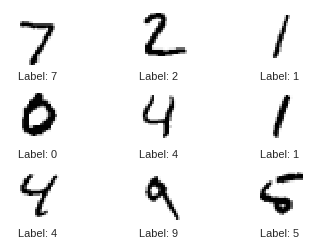

In [22]:
plot_images(mnist.test.images[:9], mnist.test.classes[:9])

In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes])
y_true_class = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [0]:
logits = tf.matmul(x, weights) + biases
y_predict = tf.nn.softmax(logits)
y_predict_class = tf.argmax(y_predict, axis=1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_predict_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
batch_size = 100

In [0]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = mnist.train.next_batch(batch_size)
        feed_dict = {x: x_batch, y_true: y_true_batch}
        sess.run(train_op, feed_dict=feed_dict)

In [0]:
feed_dict_test = {x: mnist.test.images, y_true: mnist.test.labels, y_true_class: mnist.test.classes}
def print_test_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test set: {0:.1%}'.format(acc))

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [0]:
def print_confusion_matrix():
    test_class_true = mnist.test.classes
    test_class_predict = sess.run(y_predict_class, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=test_class_true, y_pred=test_class_predict)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True Label')
    plt.show()

In [0]:
def plot_errors():
    correct, class_predict = sess.run([correct_prediction, y_predict_class], feed_dict=feed_dict_test)
    incorrect = (correct == False)
    incorrect_images = mnist.test.images[incorrect]
    incorrect_predict_class = class_predict[incorrect]
    incorrect_true_class = mnist.test.classes[incorrect]
    plot_images(incorrect_images[0:9], incorrect_true_class[0:9], incorrect_predict_class[0:9])

In [0]:
def plot_weights():
    w = sess.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            image = w[:, i].reshape(img_shape)
            ax.set_xlabel('Weight: {0}'.format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Accuracy on test set: 9.8%


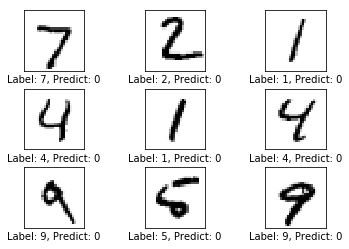

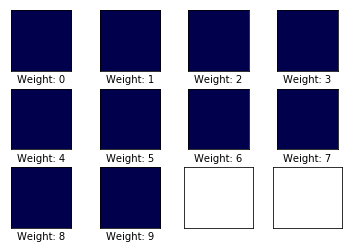

[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


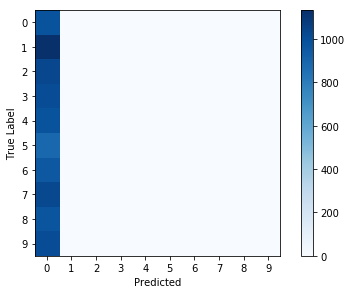

In [0]:
print_test_accuracy()
plot_errors()
plot_weights()
print_confusion_matrix()

Accuracy on test set: 15.3%


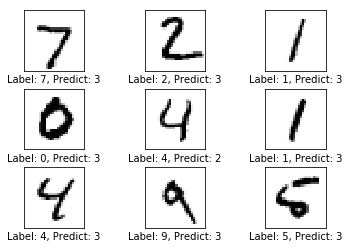

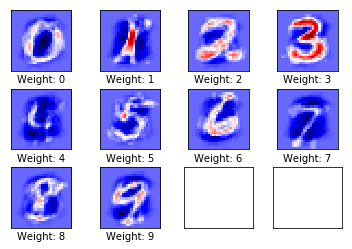

[[   1    0    1  976    0    0    2    0    0    0]
 [   0  155   21  959    0    0    0    0    0    0]
 [   0    0  182  846    0    0    4    0    0    0]
 [   0    0    3 1007    0    0    0    0    0    0]
 [   0    0  118  743    0    0    8    0    1  112]
 [   0    0    4  882    0    0    0    0    3    3]
 [   0    0    9  920    0    0   28    0    0    1]
 [   0    0   52  935    0    0    0    0    0   41]
 [   0    0    7  965    0    0    2    0    0    0]
 [   0    0   22  825    0    0    0    0    1  161]]


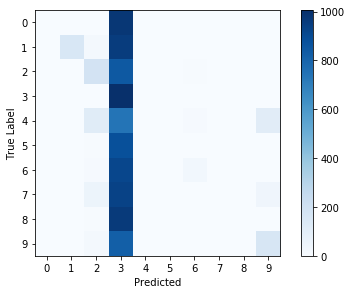

In [0]:
optimize(1)
print_test_accuracy()
plot_errors()
plot_weights()
print_confusion_matrix()

Accuracy on test set: 78.8%


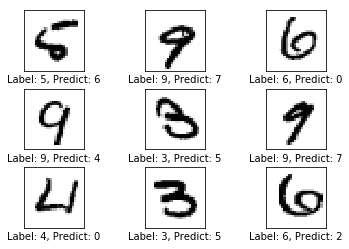

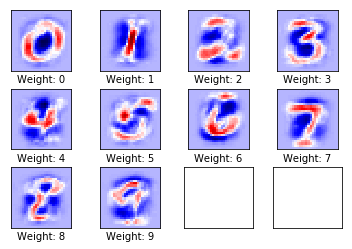

[[ 908    0    3    0    0   55   11    1    2    0]
 [   0 1110    9    1    0    2    4    1    8    0]
 [  29   40  856    4   19    7   30   20   26    1]
 [  11   26   62  658    1  186    8   29   24    5]
 [   7   21    3    0  898   11   25    7    2    8]
 [  26   50    7    5   25  740   16   14    4    5]
 [  43   15   14    0   17   47  822    0    0    0]
 [   8   55   36    0   24    3    1  890    5    6]
 [  12   76   30   21   23  242   14   29  522    5]
 [  20   27   10    6  244   62    4  158    3  475]]


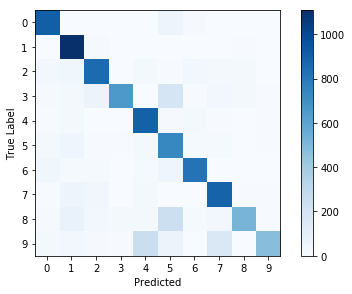

In [0]:
optimize(10)
print_test_accuracy()
plot_errors()
plot_weights()
print_confusion_matrix()

Accuracy on test set: 91.9%


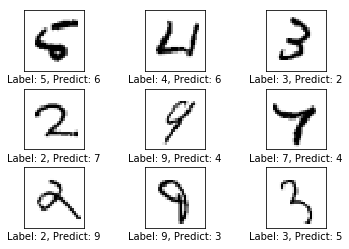

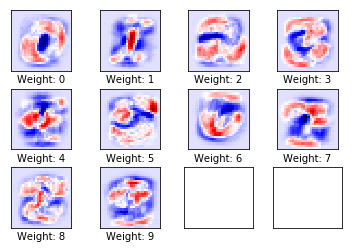

[[ 965    0    2    1    0    2    8    1    1    0]
 [   0 1113    2    2    0    1    4    2   11    0]
 [  12    7  935   11    8    1   16   14   21    7]
 [   5    1   27  912    0   23    4   16   14    8]
 [   1    3    4    1  906    0   15    3    8   41]
 [  12    5    3   40   10  759   21    9   26    7]
 [  12    3    5    1    9   11  914    1    2    0]
 [   4    8   24    6    5    0    0  946    1   34]
 [  13   10   11   25    9   28   13   15  833   17]
 [  12    7    2   11   31    6    1   28    6  905]]


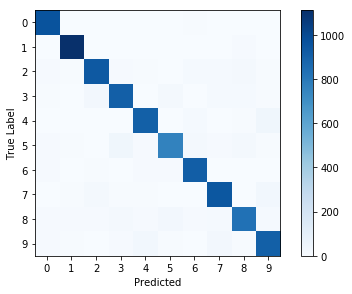

In [0]:
optimize(1000)
print_test_accuracy()
plot_errors()
plot_weights()
print_confusion_matrix()

In [0]:
sess.close()